In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data1=pd.read_excel(r"C:\Users\rosha\Desktop\assignments\Clustering\EastWestAirlines.xlsx",sheet_name="data")
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data1.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
data1.drop("ID#",axis=1,inplace=True)

In [6]:
data1[data1.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3370,1000,0,1,1,1,0,0,0,0,1597,0
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [7]:
data1.drop(3876,axis=0,inplace=True)

In [8]:
data1[data1.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [9]:
data1.Bonus_trans.unique()

array([ 1,  2,  4, 26,  0, 25, 43, 28, 10, 19, 20,  6, 15, 16,  5, 17, 23,
       11, 21,  8, 13, 14, 18, 24, 38, 45,  7, 12, 22,  3,  9, 39, 41, 27,
       40, 31, 30, 34, 32, 35, 37, 29, 47, 53, 55, 51, 33, 50, 36, 46, 52,
       44, 65, 49, 58, 86, 68], dtype=int64)

In [10]:
data1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [11]:
data1.mode()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1000,0,1,1,1,0,0,0,0,8296,0


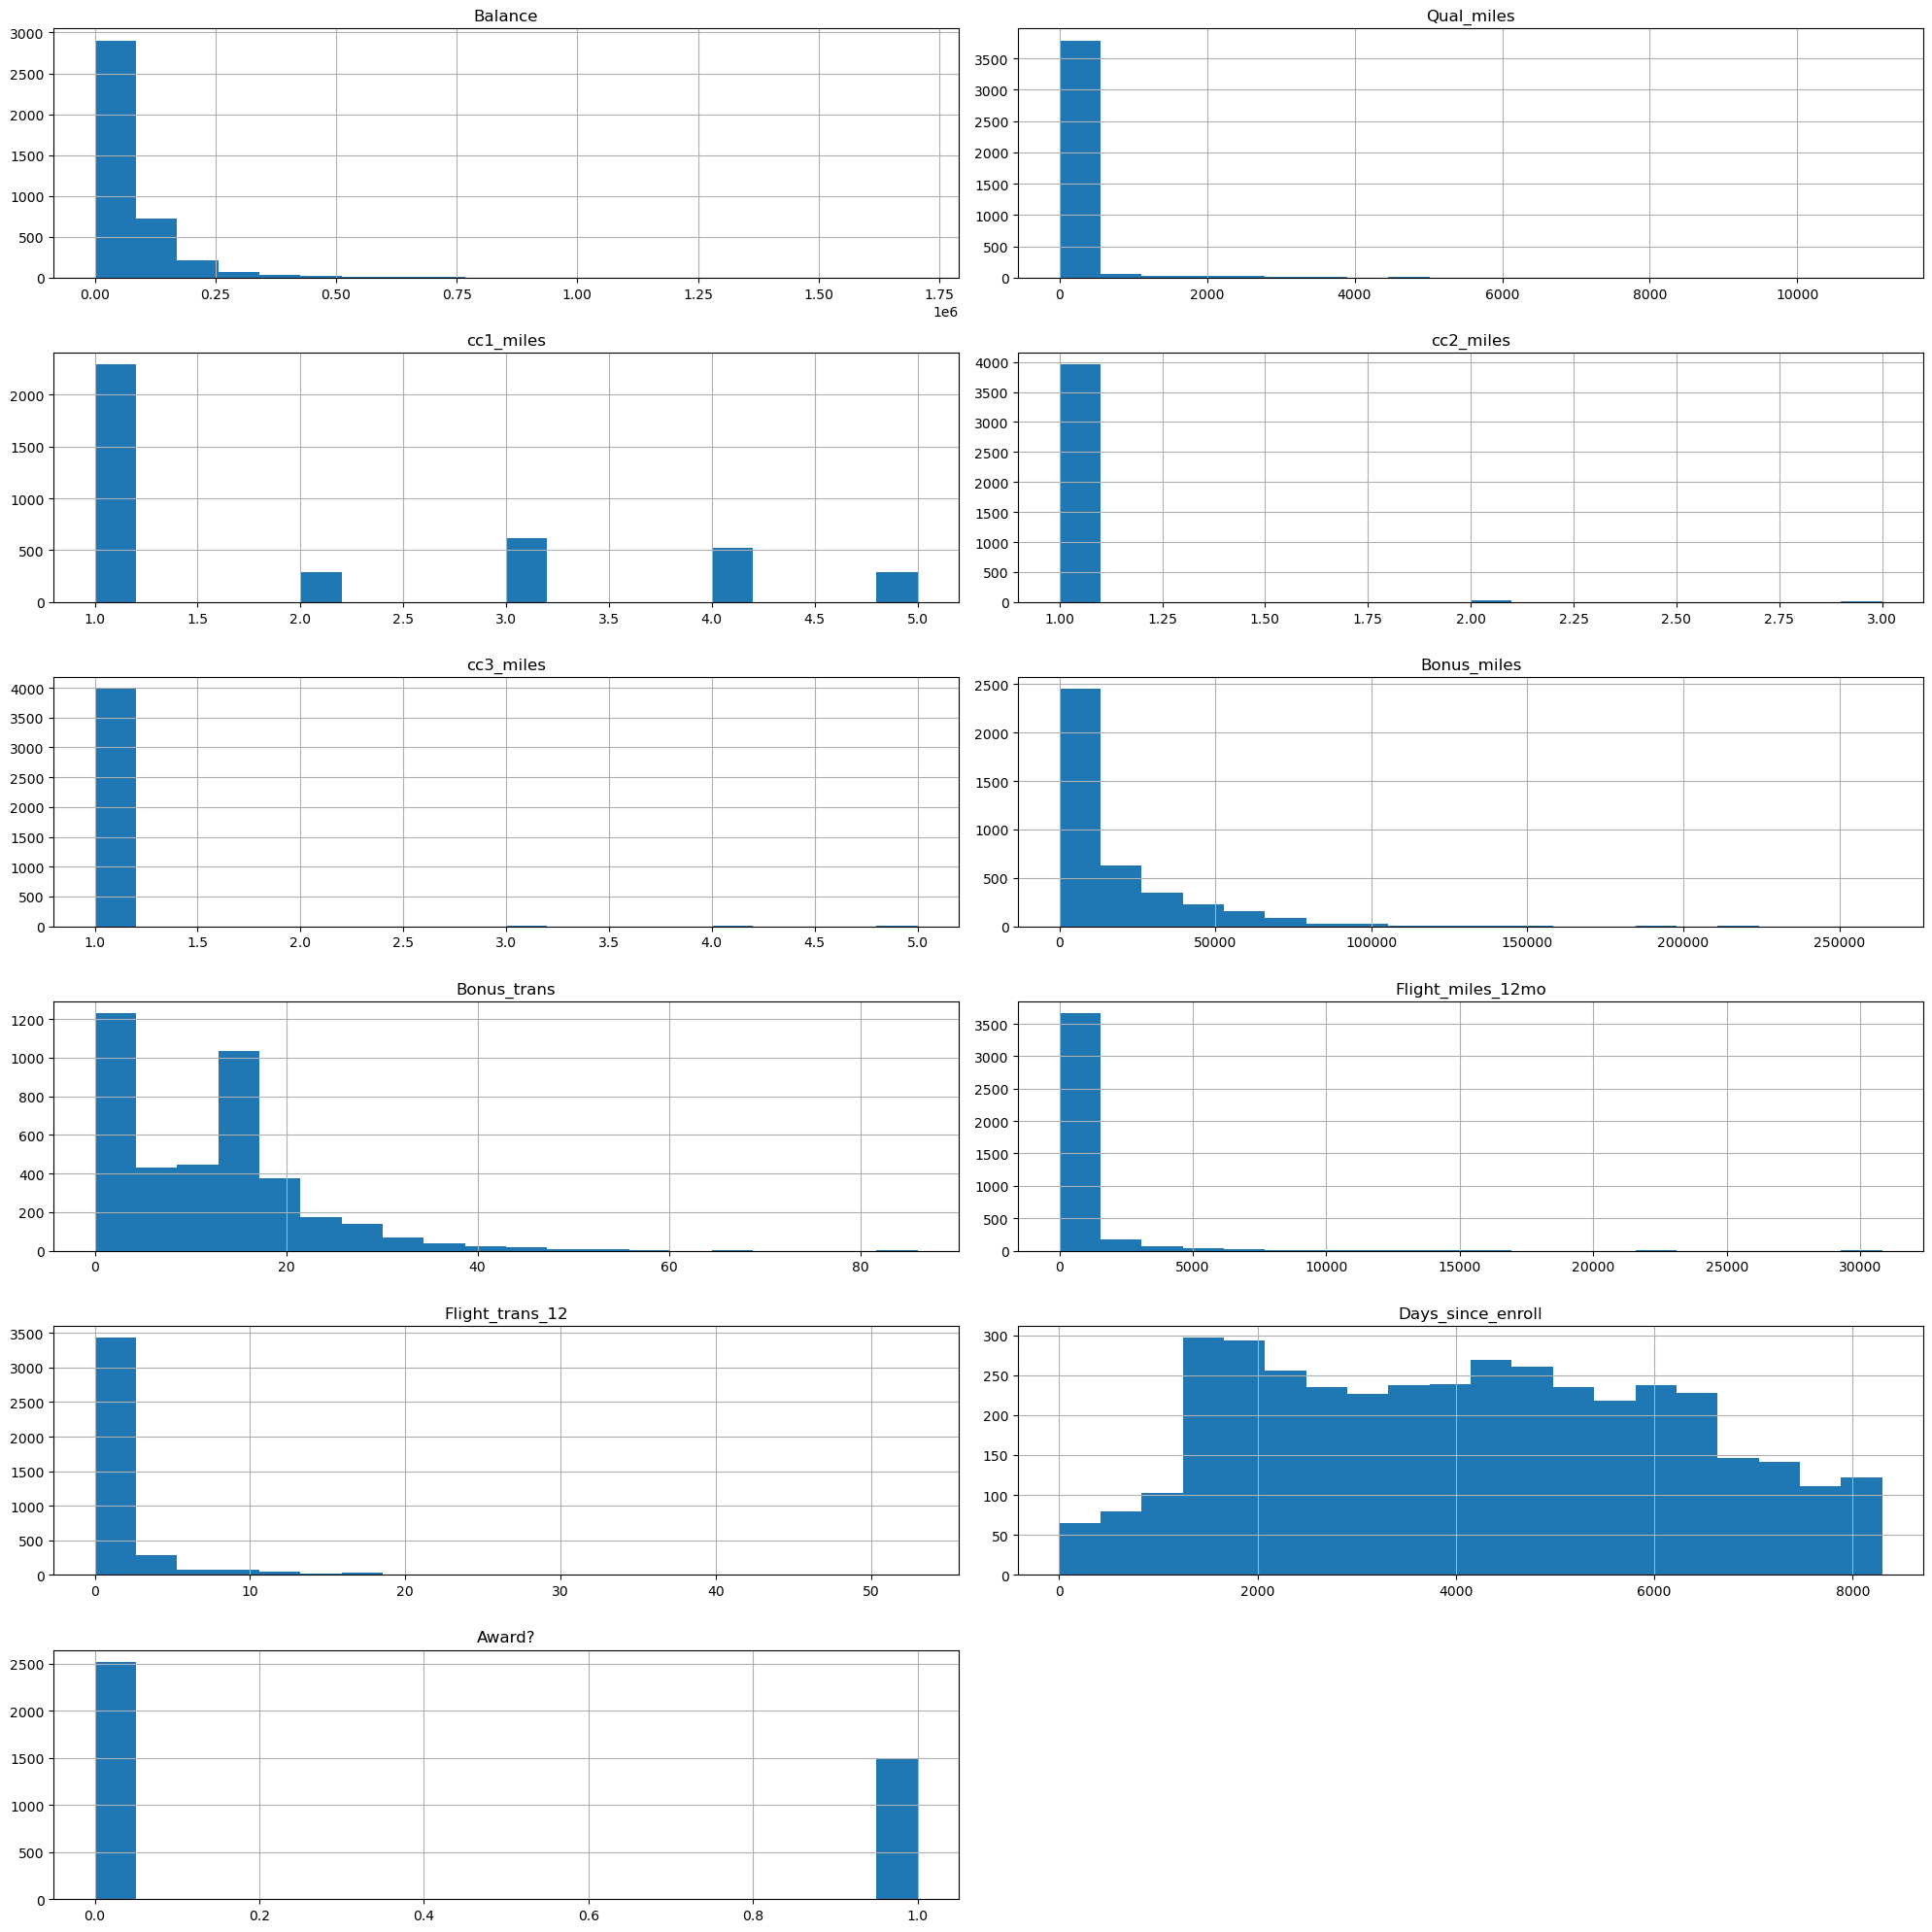

In [12]:
data1.hist(bins=20,figsize=(20,20),layout=(6,2))
plt.tight_layout()
plt.show()

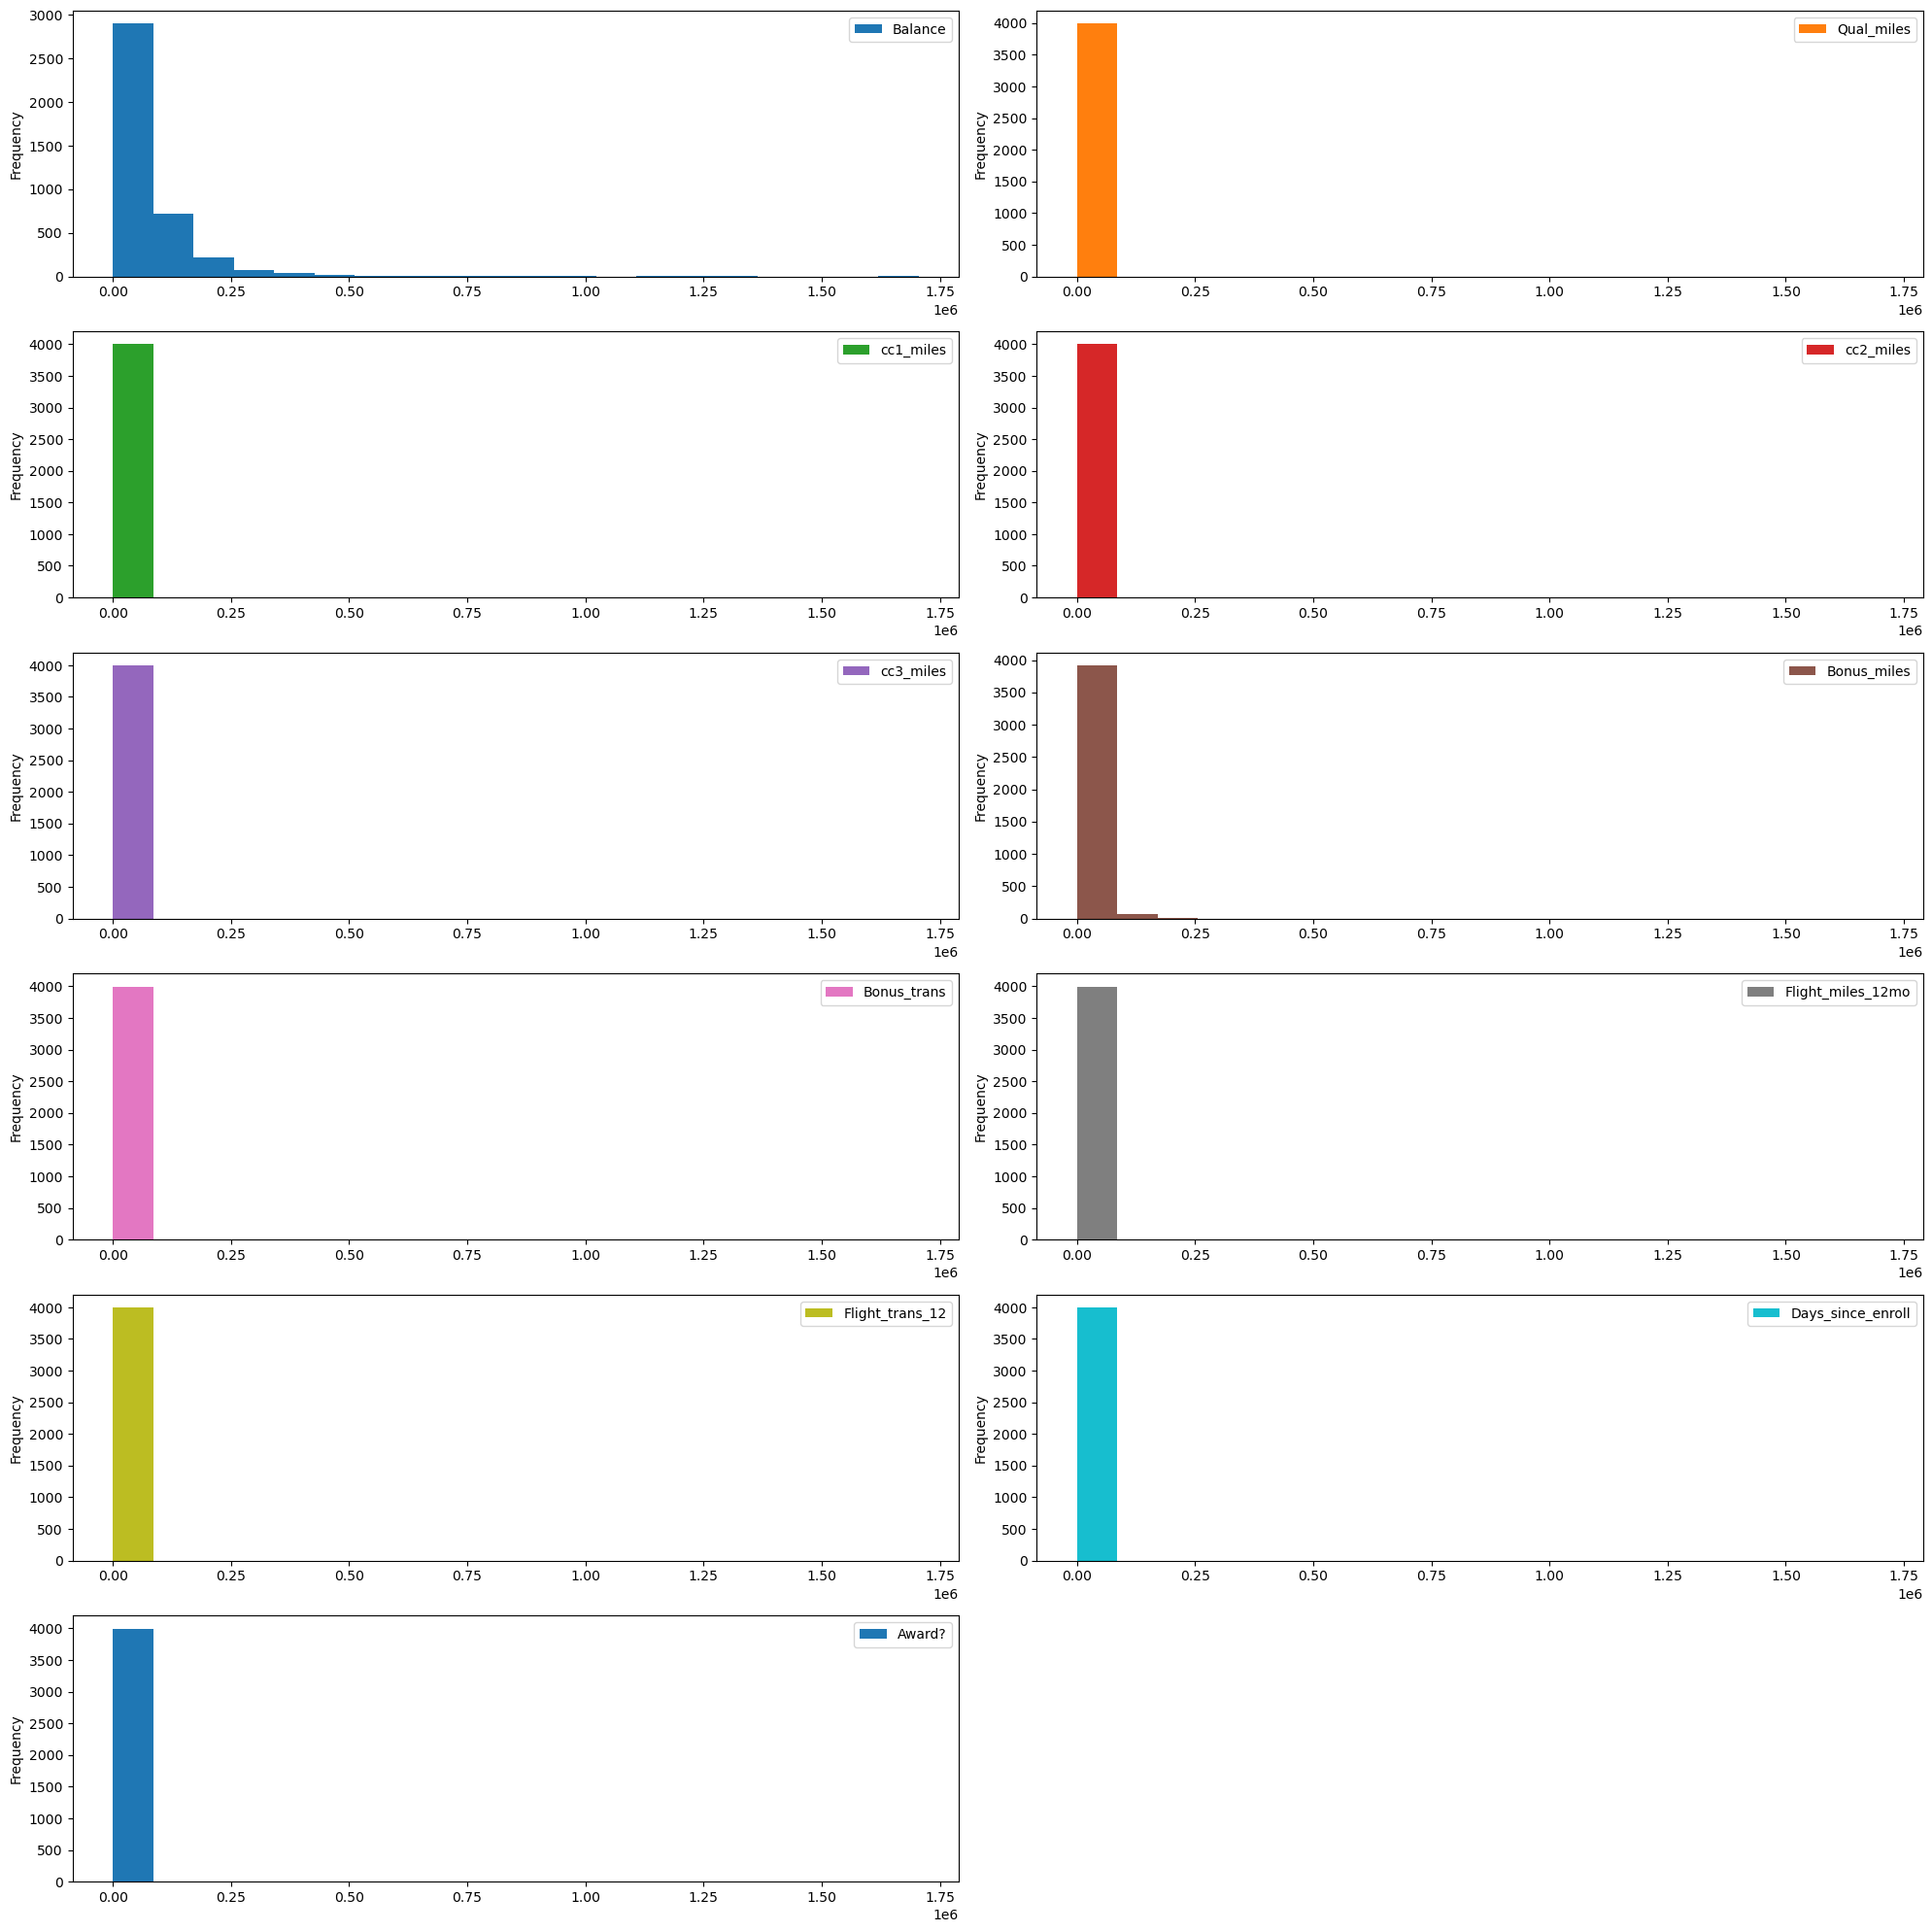

In [13]:
data1.plot(kind="hist",bins=20,figsize=(20,20),layout=(6,2),subplots=True,density=False,sharex=False, sharey=False)
plt.tight_layout()
plt.show()

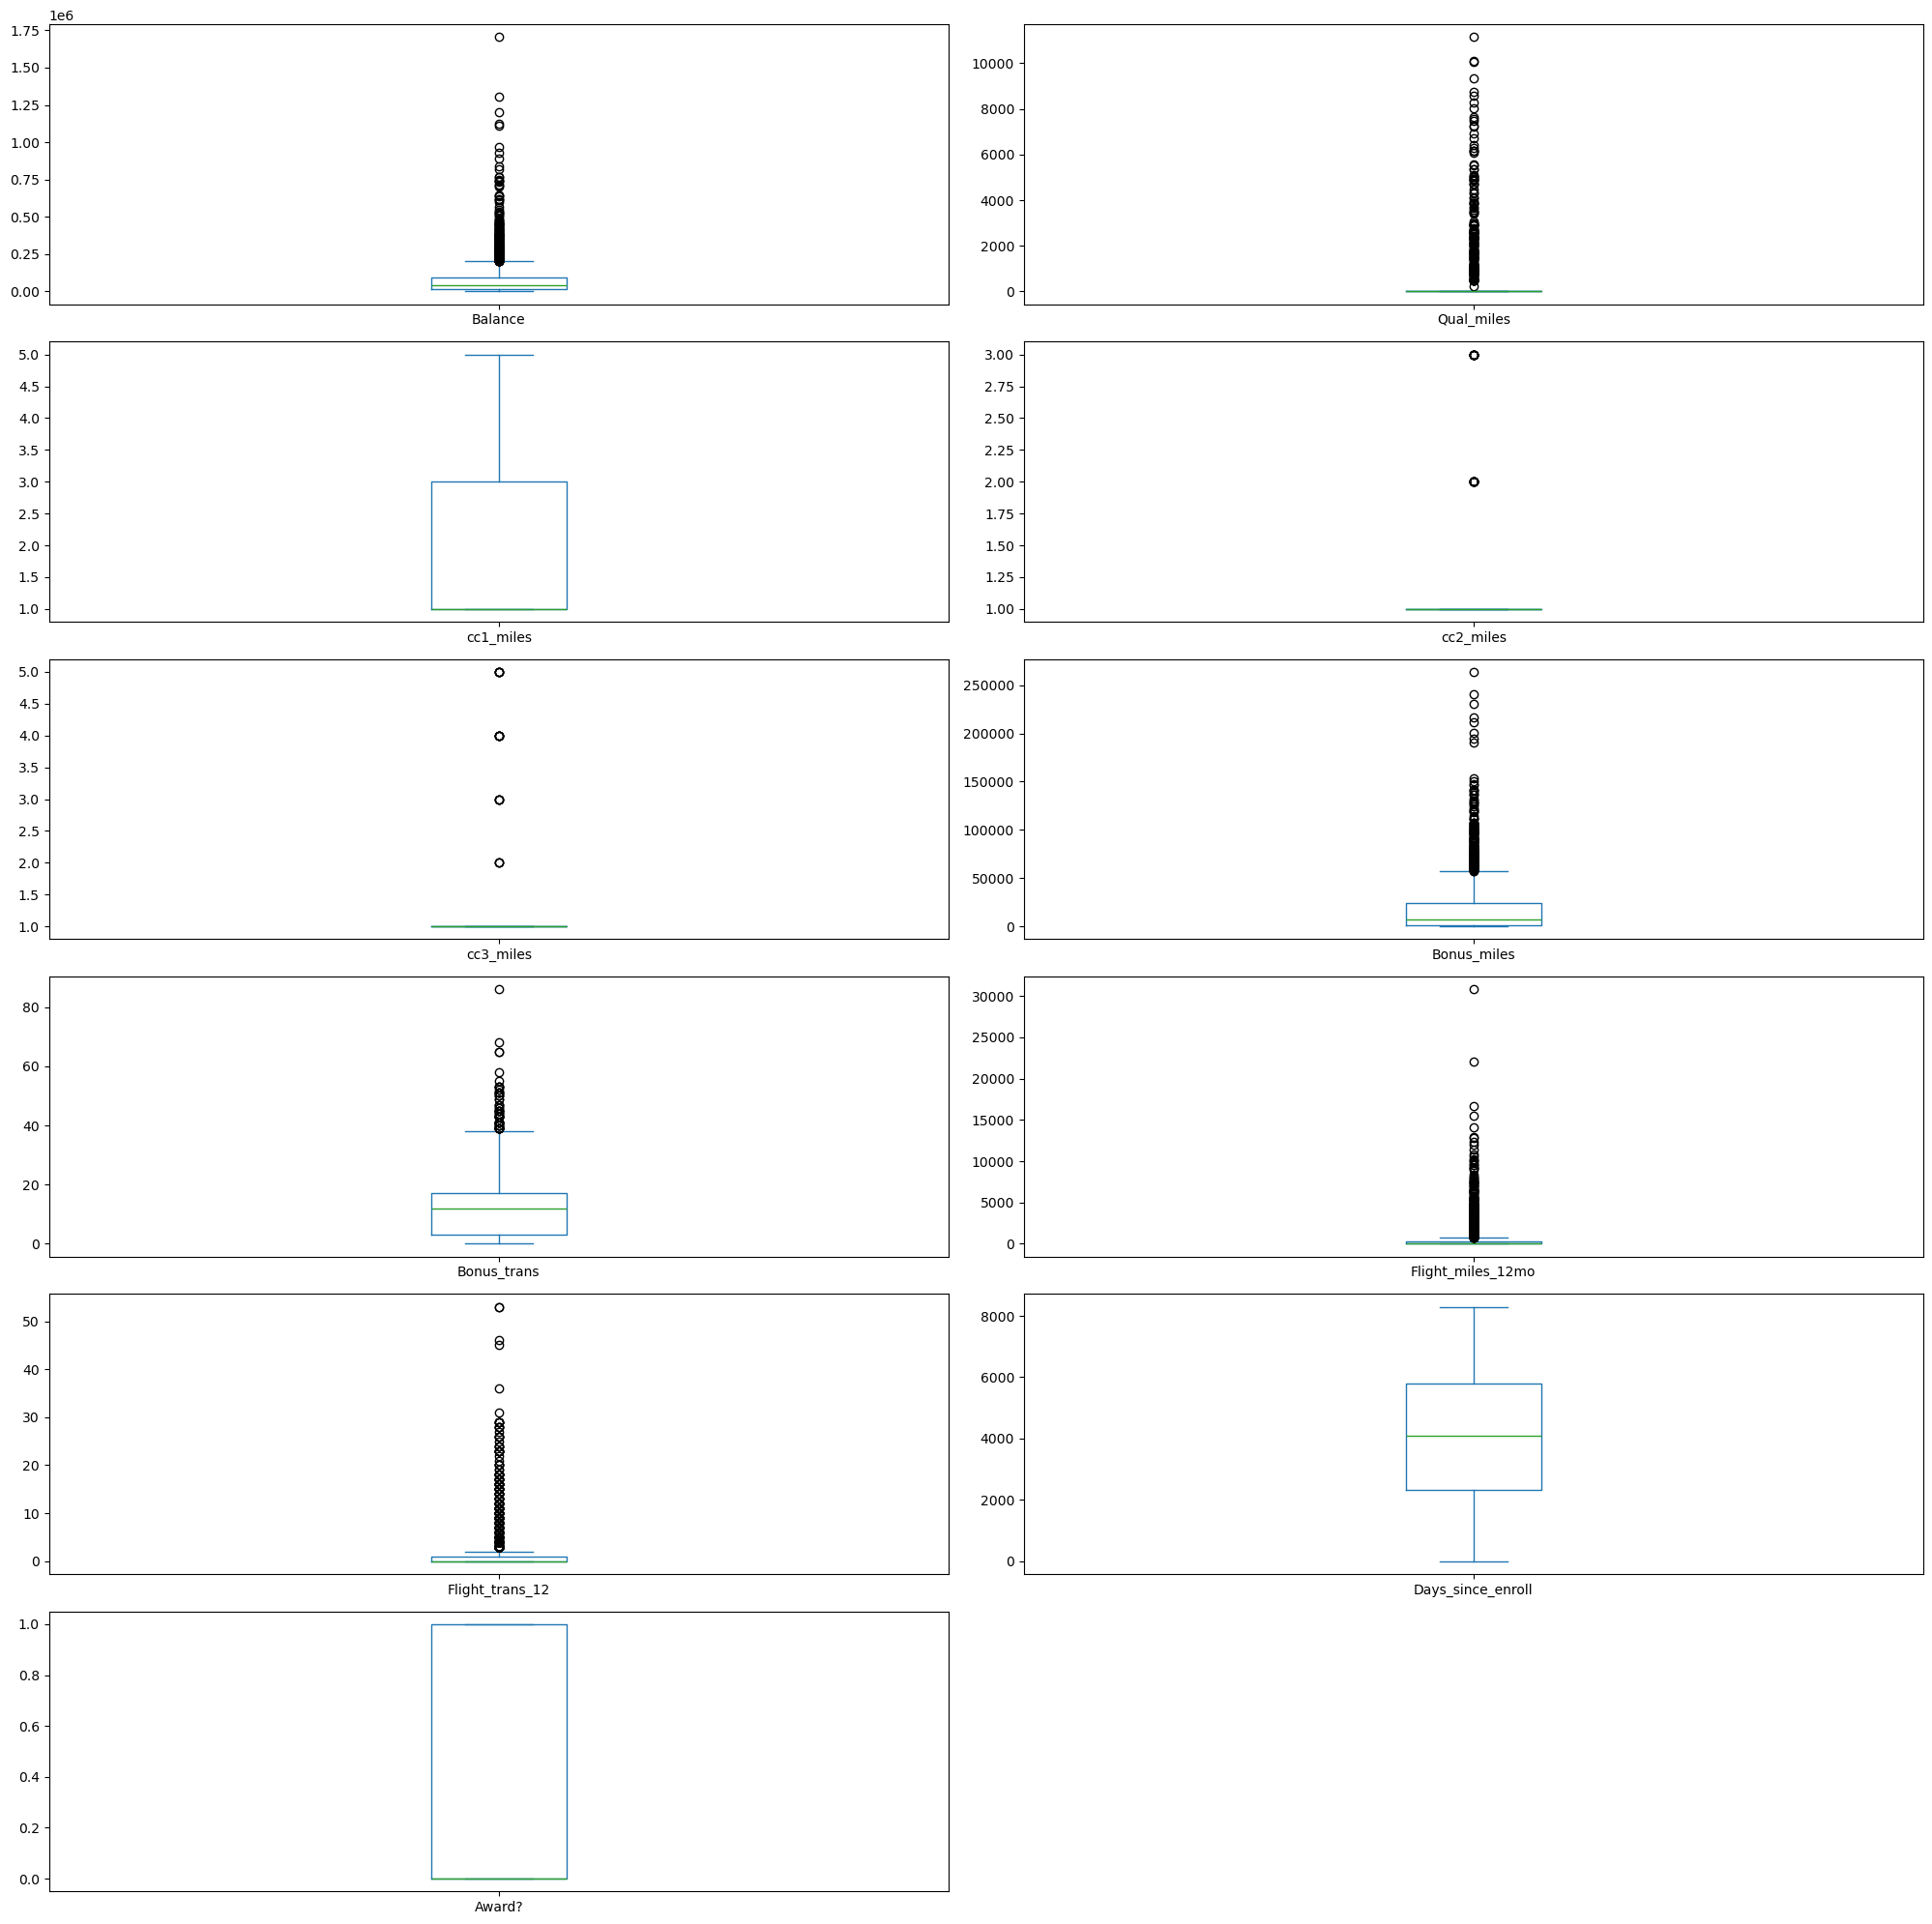

In [14]:
data1.plot(kind="box",figsize=(20,20),layout=(6,2),subplots=True)
plt.tight_layout()
plt.show()

In [15]:
data1.skew()

Balance               5.004089
Qual_miles            7.511416
cc1_miles             0.857189
cc2_miles            11.209026
cc3_miles            17.193362
Bonus_miles           2.841832
Bonus_trans           1.157386
Flight_miles_12mo     7.450799
Flight_trans_12       5.489785
Days_since_enroll     0.119765
Award?                0.536789
dtype: float64

In [16]:
data1.Balance.unique()

array([28143, 19244, 41354, ..., 73597, 54899,  3016], dtype=int64)

In [17]:
data1.Qual_miles.value_counts()

Qual_miles
0       3772
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [18]:
data1.cc2_miles.value_counts()

cc2_miles
1    3955
2      28
3      15
Name: count, dtype: int64

In [19]:
data1.Flight_miles_12mo .value_counts()

Flight_miles_12mo
0        2722
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: count, Length: 343, dtype: int64

In [20]:
data1["Award?"].value_counts()

Award?
0    2517
1    1481
Name: count, dtype: int64

In [21]:
skewed_col=["Balance","Qual_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12"]

In [22]:
data2=data1.copy()

In [23]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
data1[skewed_col]=pt.fit_transform(data1[skewed_col])

In [24]:
data1.skew()

Balance               0.024564
Qual_miles            3.842038
cc1_miles             0.857189
cc2_miles            11.209026
cc3_miles            17.193362
Bonus_miles          -0.266325
Bonus_trans          -0.132492
Flight_miles_12mo     0.787345
Flight_trans_12       0.862875
Days_since_enroll     0.119765
Award?                0.536789
dtype: float64

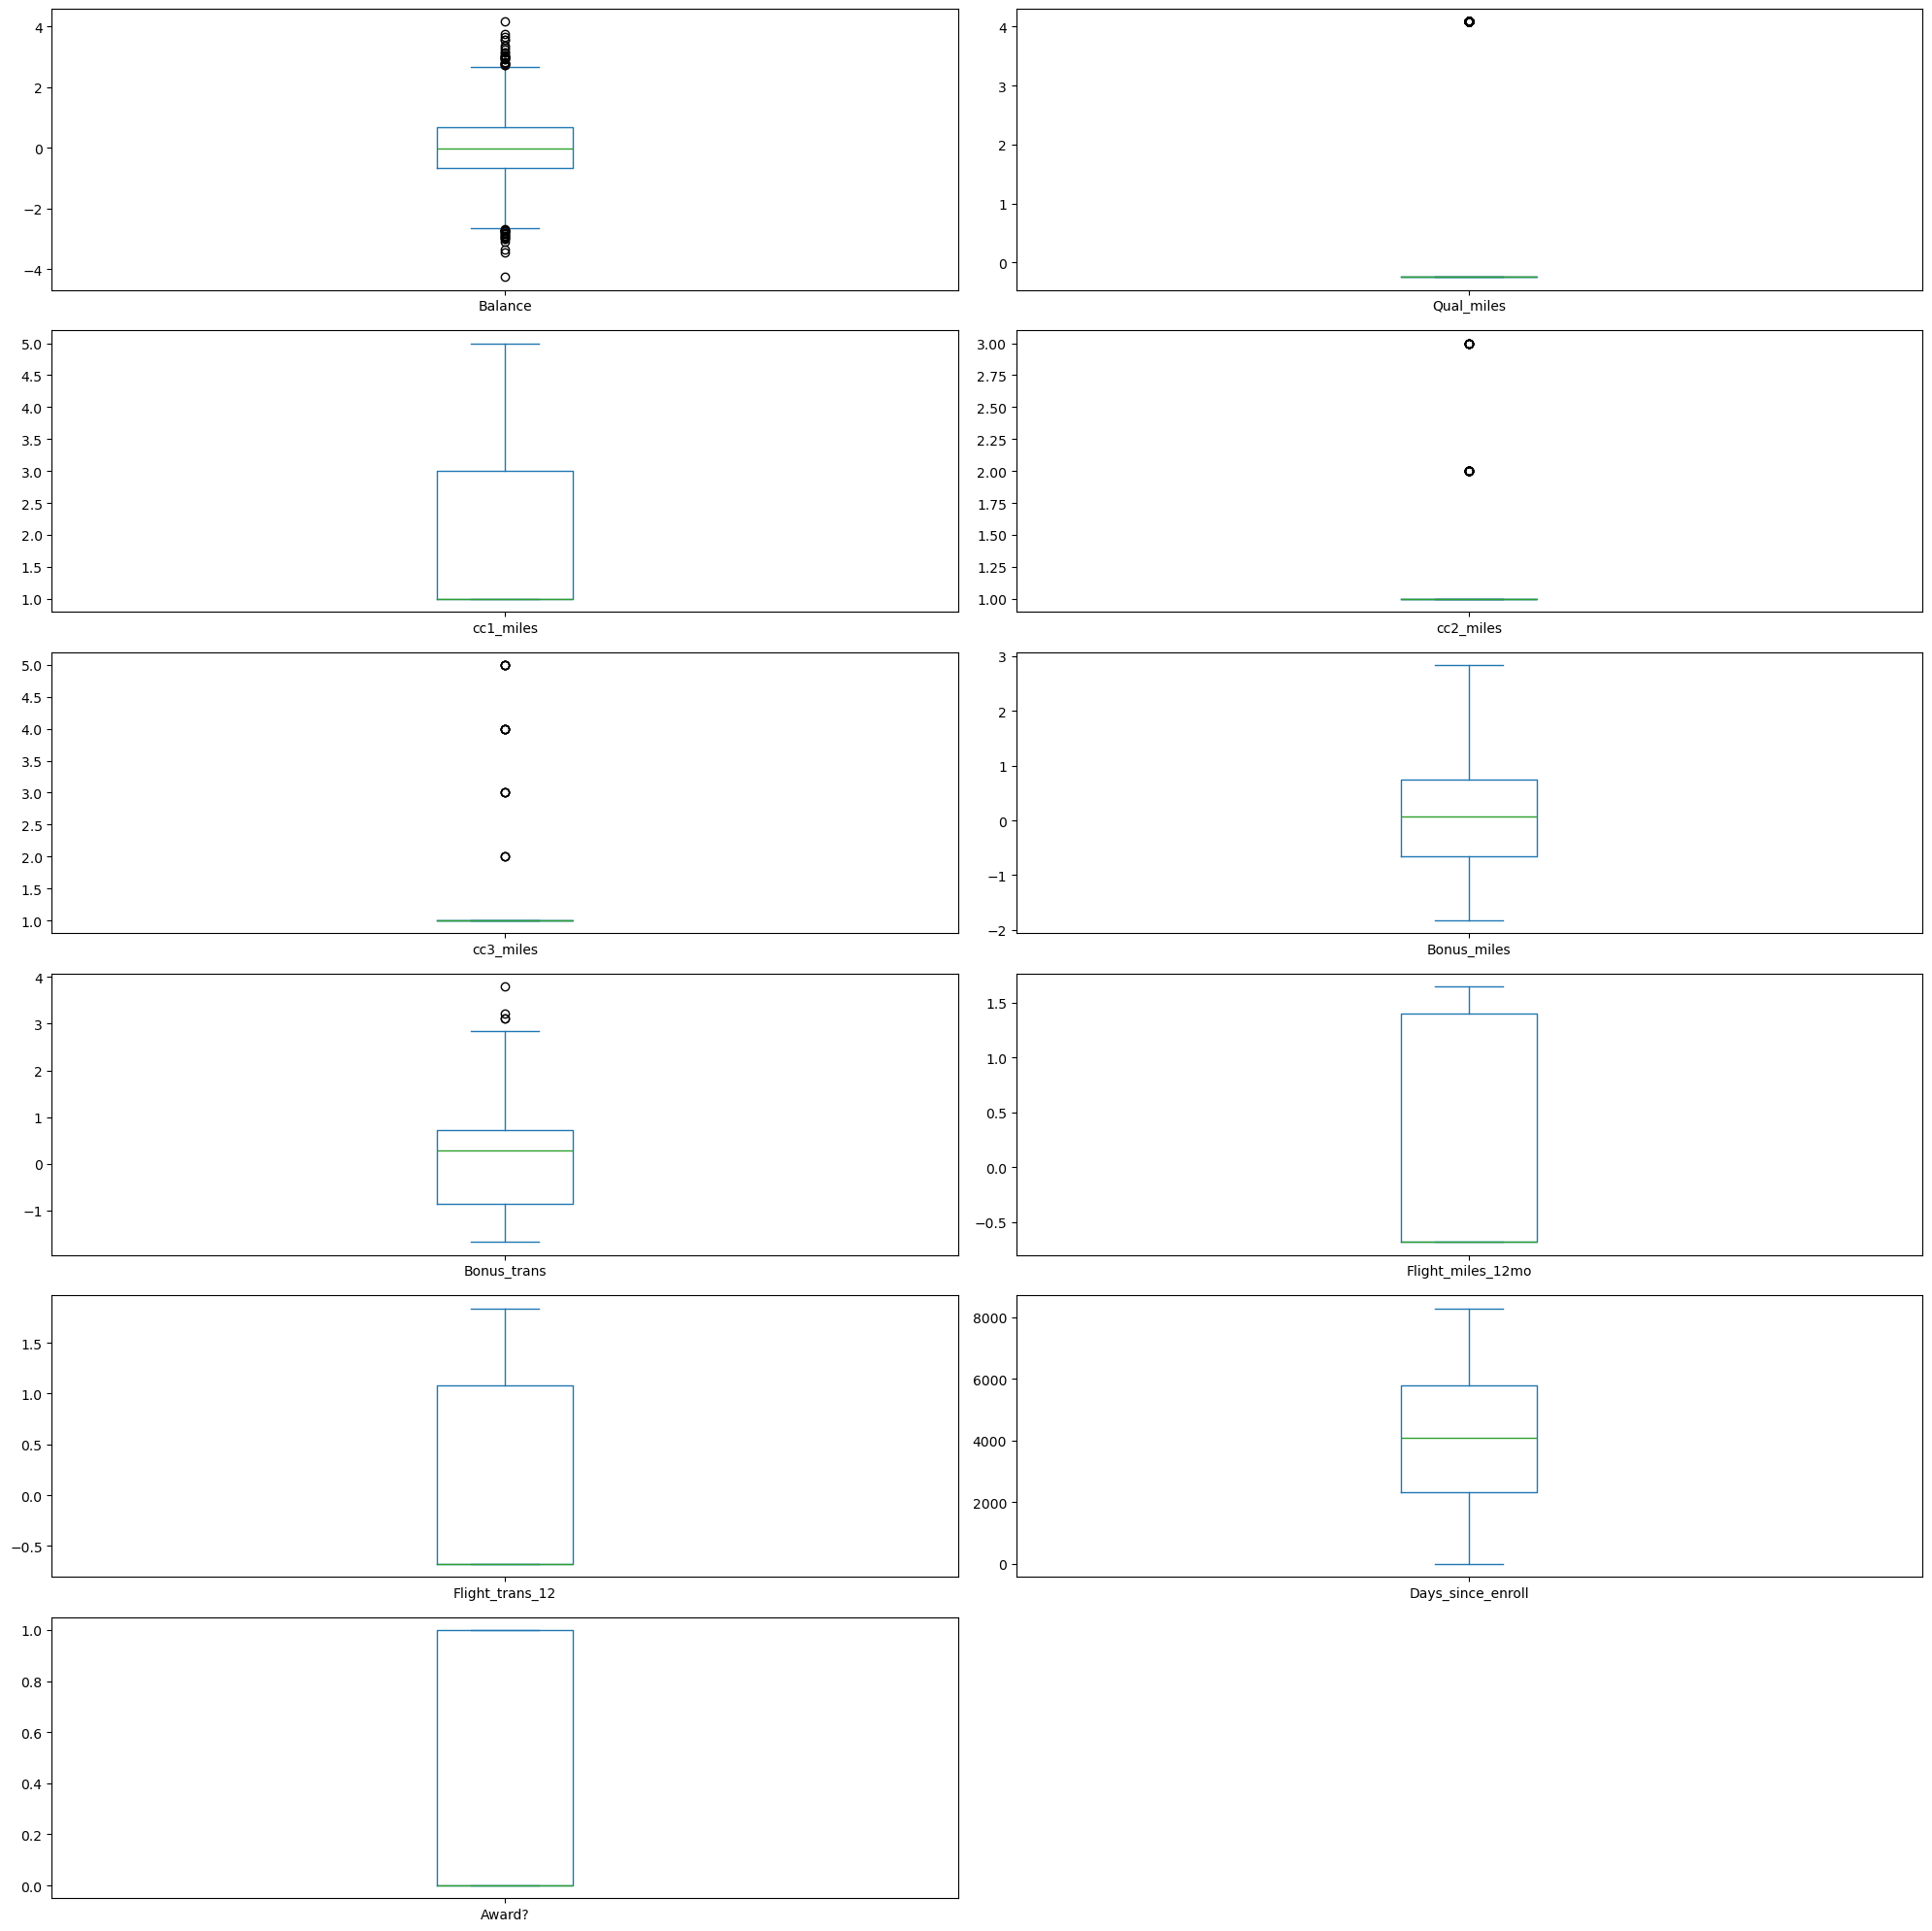

In [25]:
data1.plot(kind="box",layout=(6,2),figsize=(20,20),subplots=True)
plt.tight_layout()
plt.show()

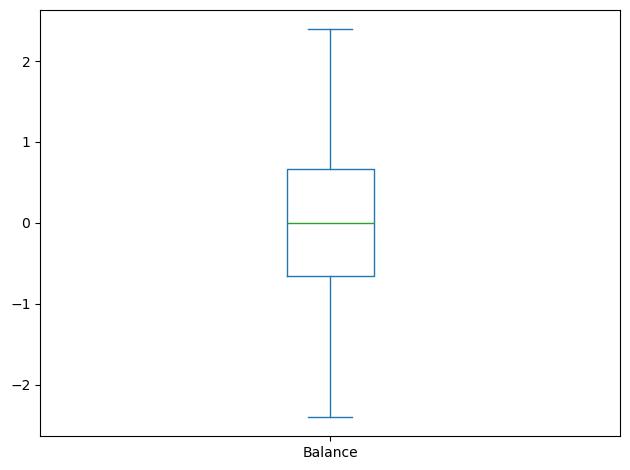

In [26]:
upper=data1.Balance.quantile(0.99)
lower=data1.Balance.quantile(0.01)
data1.Balance=np.clip(data1["Balance"],lower,upper)
data1.Balance.plot(kind="box")
plt.tight_layout()
plt.show()

In [27]:
 data2[skewed_col]=np.log1p(data2[skewed_col])

In [28]:
data2.skew()

Balance              -0.829761
Qual_miles            3.914008
cc1_miles             0.857189
cc2_miles            11.209026
cc3_miles            17.193362
Bonus_miles          -1.486572
Bonus_trans          -0.785965
Flight_miles_12mo     0.916367
Flight_trans_12       1.829538
Days_since_enroll     0.119765
Award?                0.536789
dtype: float64

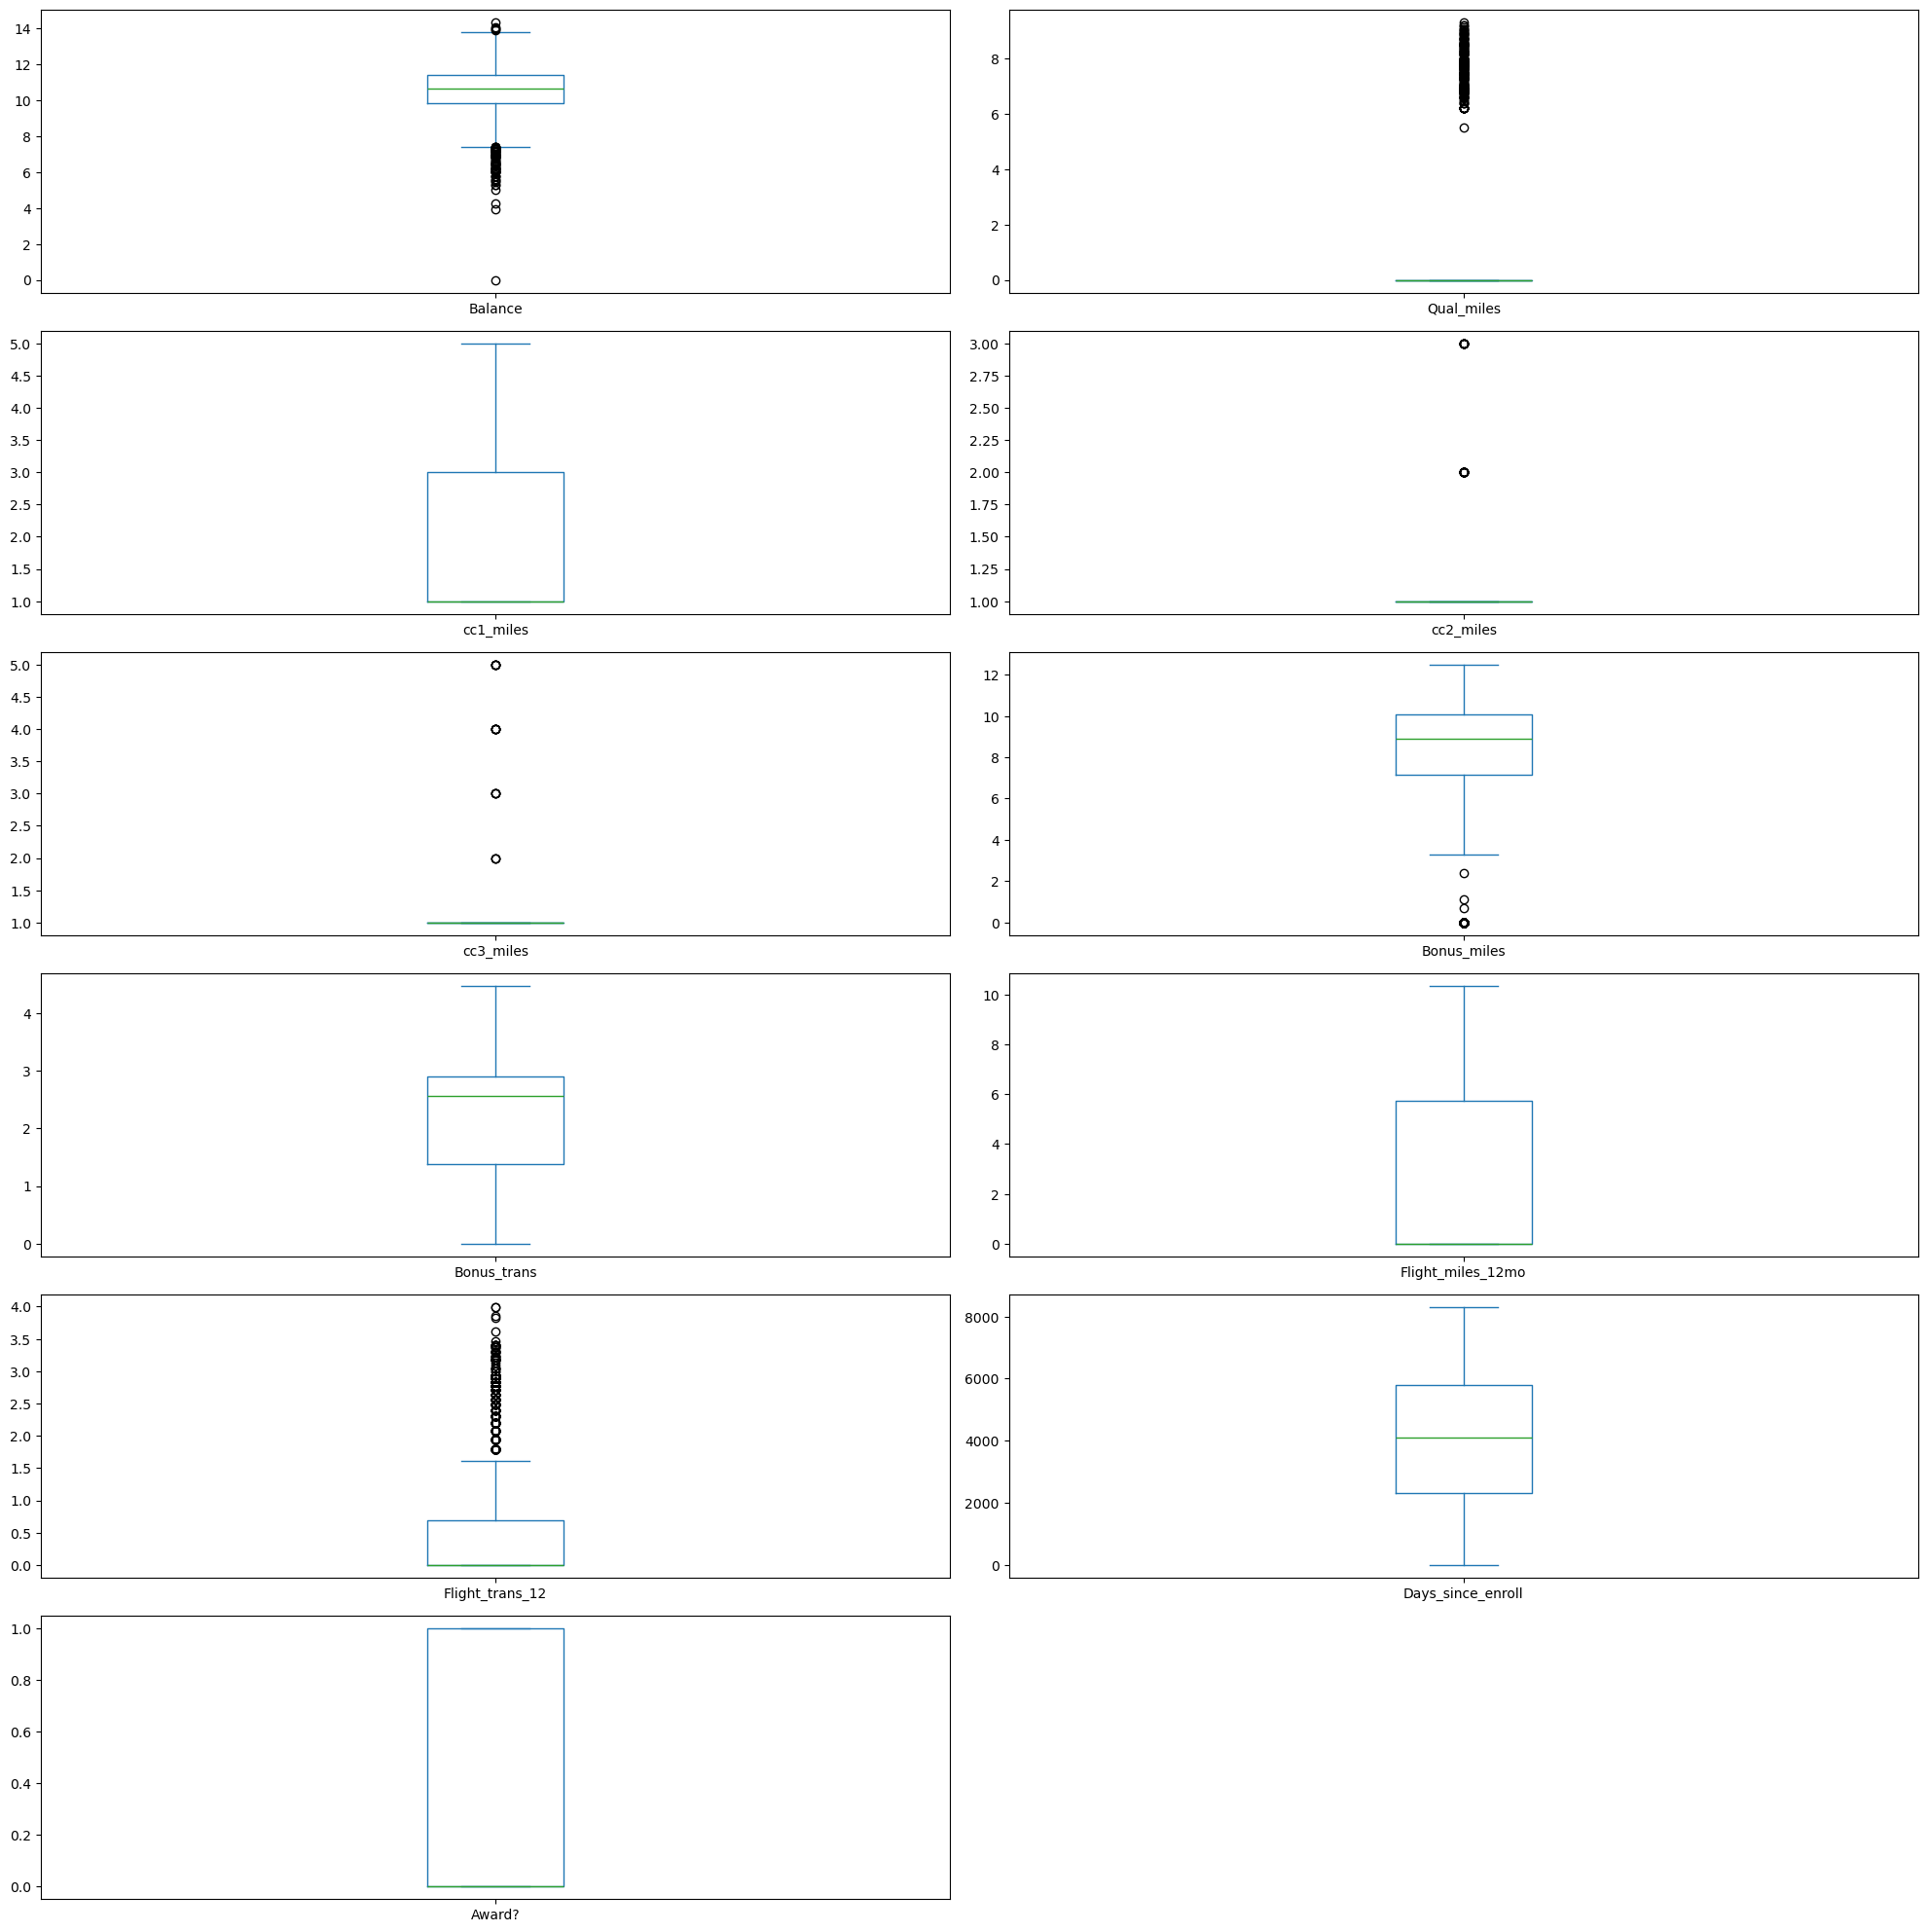

In [29]:
data2.plot(kind="box",layout=(6,2),figsize=(20,20),subplots=True)
plt.tight_layout()
plt.show()

In [30]:
cliped_col=["Balance","Qual_miles","Flight_trans_12"]
upper={}
lower={}
for col in cliped_col:
    upper[col]=data2[col].quantile(0.99)
    lower[col]=data2[col].quantile(0.01)
    data2[col]=np.clip(data2[col],lower,upper)

In [31]:
data2.skew()

Balance              -0.829761
Qual_miles            3.914008
cc1_miles             0.857189
cc2_miles            11.209026
cc3_miles            17.193362
Bonus_miles          -1.486572
Bonus_trans          -0.785965
Flight_miles_12mo     0.916367
Flight_trans_12       1.829538
Days_since_enroll     0.119765
Award?                0.536789
dtype: float64

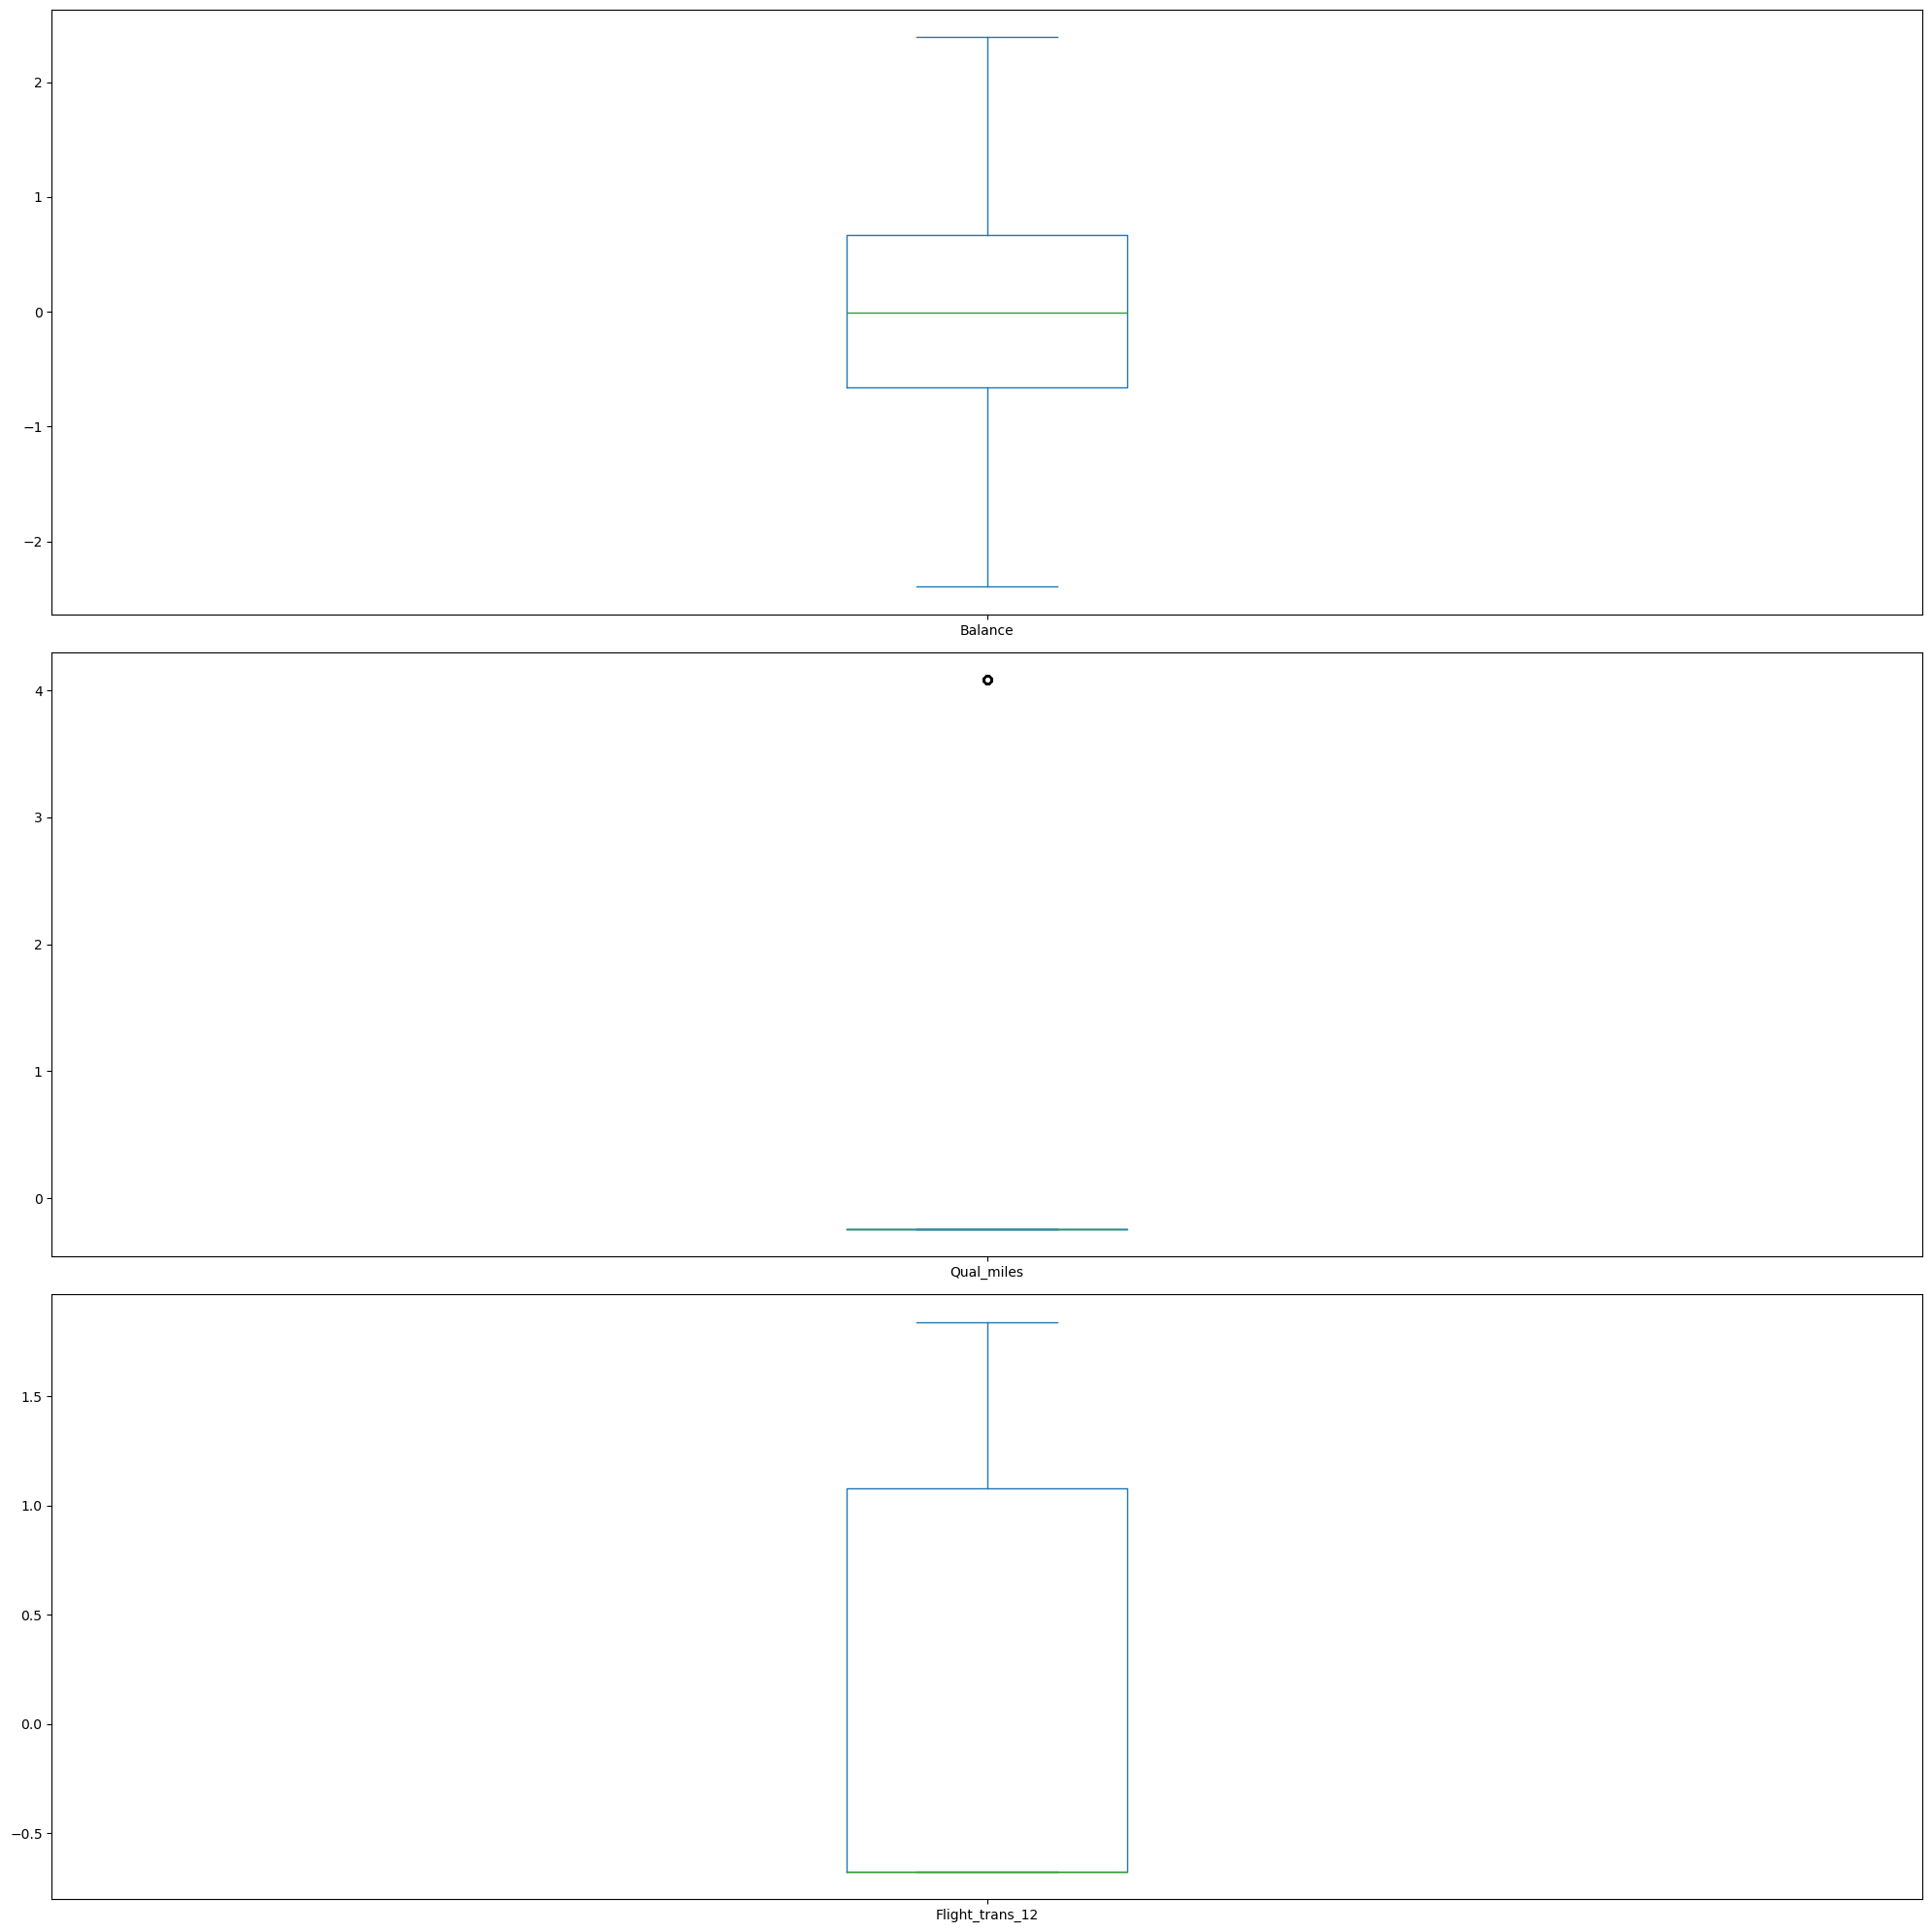

In [32]:
data1[cliped_col].plot(kind="box",subplots=True,figsize=(20,20),layout=(3,1))
plt.tight_layout()
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
for col in ["cc1_miles","cc2_miles","cc3_miles","Award?"] :
    data1[col]=st.fit_transform(data1[[col]])
data1.drop(["Award?","Qual_miles"],axis=1,inplace=True)
data1

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.347411,-0.769732,-0.098254,-0.062774,-1.179241,-1.330354,-0.683432,-0.675085,7000
1,-0.633887,-0.769732,-0.098254,-0.062774,-1.133253,-1.075642,-0.683432,-0.675085,6968
2,-0.038958,-0.769732,-0.098254,-0.062774,-0.192576,-0.689469,-0.683432,-0.675085,7034
3,-0.822951,-0.769732,-0.098254,-0.062774,-0.925760,-1.330354,-0.683432,-0.675085,6952
4,0.723491,1.409207,-0.098254,-0.062774,1.169335,1.329679,1.548815,1.685713,6935
...,...,...,...,...,...,...,...,...,...
3994,-0.663558,-0.769732,-0.098254,-0.062774,0.153302,-0.689469,1.346623,1.080672,1403
3995,0.340255,-0.769732,-0.098254,-0.062774,-0.728666,-0.531236,-0.683432,-0.675085,1395
3996,0.460202,0.682894,-0.098254,-0.062774,0.794855,-0.134776,-0.683432,-0.675085,1402
3997,0.200614,-0.769732,-0.098254,-0.062774,-0.925760,-1.330354,1.446163,1.080672,1401


In [34]:
for col in data2.columns :
    data2[col]=st.fit_transform(data2[[col]])
data2.drop(["Award?","Qual_miles"],axis=1,inplace=True)
data2


,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.241519,-0.769732,-0.098254,-0.062774,-0.830264,-1.351599,-0.669225,-0.576626,1.395235
1,-0.539711,-0.769732,-0.098254,-0.062774,-0.766022,-0.968006,-0.669225,-0.576626,1.379736
2,0.060421,-0.769732,-0.098254,-0.062774,0.134101,-0.484736,-0.669225,-0.576626,1.411702
3,-0.746972,-0.769732,-0.098254,-0.062774,-0.509250,-1.351599,-0.669225,-0.576626,1.371987
4,0.735326,1.409207,-0.098254,-0.062774,0.851730,1.110693,1.760168,1.574940,1.363754
...,...,...,...,...,...,...,...,...,...
3994,-0.571661,-0.769732,-0.098254,-0.062774,0.355765,-0.484736,1.017323,0.350003,-1.315506
3995,0.407741,-0.769732,-0.098254,-0.062774,-0.303856,-0.312250,-0.669225,-0.576626,-1.319381
3996,0.512652,0.682894,-0.098254,-0.062774,0.689505,0.071343,-0.669225,-0.576626,-1.315990
3997,0.282698,-0.769732,-0.098254,-0.062774,-0.509250,-1.351599,1.307770,0.350003,-1.316475


In [35]:
data2

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.241519,-0.769732,-0.098254,-0.062774,-0.830264,-1.351599,-0.669225,-0.576626,1.395235
1,-0.539711,-0.769732,-0.098254,-0.062774,-0.766022,-0.968006,-0.669225,-0.576626,1.379736
2,0.060421,-0.769732,-0.098254,-0.062774,0.134101,-0.484736,-0.669225,-0.576626,1.411702
3,-0.746972,-0.769732,-0.098254,-0.062774,-0.509250,-1.351599,-0.669225,-0.576626,1.371987
4,0.735326,1.409207,-0.098254,-0.062774,0.851730,1.110693,1.760168,1.574940,1.363754
...,...,...,...,...,...,...,...,...,...
3994,-0.571661,-0.769732,-0.098254,-0.062774,0.355765,-0.484736,1.017323,0.350003,-1.315506
3995,0.407741,-0.769732,-0.098254,-0.062774,-0.303856,-0.312250,-0.669225,-0.576626,-1.319381
3996,0.512652,0.682894,-0.098254,-0.062774,0.689505,0.071343,-0.669225,-0.576626,-1.315990
3997,0.282698,-0.769732,-0.098254,-0.062774,-0.509250,-1.351599,1.307770,0.350003,-1.316475


In [36]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [37]:
WCSS=[]
for k in range(1,21):
    model=KMeans(n_clusters=k,random_state=42)
    fits=model.fit(data1)
    WCSS.append(np.round(fits.inertia_,2))
WCSS  
    

[17044265051.12,
 4715758043.68,
 2158571775.83,
 1350244778.21,
 872502194.1,
 619847653.48,
 478734546.18,
 344434597.08,
 279996000.68,
 218801073.92,
 176870268.85,
 150221324.23,
 129558748.91,
 111512933.33,
 100158444.6,
 83213910.94,
 74528702.21,
 66260884.26,
 60663554.53,
 56110071.09]

In [38]:
WCSS2=[]
for k in range(1,21):
    model=KMeans(n_clusters=k,random_state=42)
    fits=model.fit(data2)
    WCSS2.append(np.round(fits.inertia_,2))
WCSS2  
    

[35982.0,
 27498.07,
 22173.9,
 19793.35,
 18740.17,
 17074.6,
 13441.55,
 10250.27,
 9404.62,
 8954.86,
 8238.94,
 7709.97,
 7417.47,
 7075.1,
 6632.13,
 6480.03,
 6262.12,
 6001.46,
 5625.44,
 5482.56]

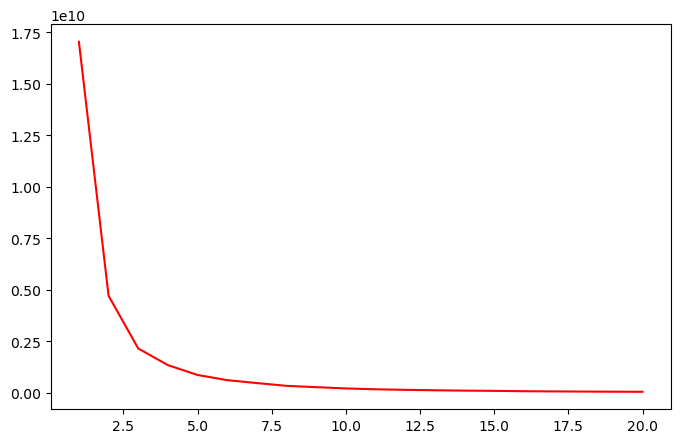

In [39]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,21),WCSS,color='red')
plt.show()

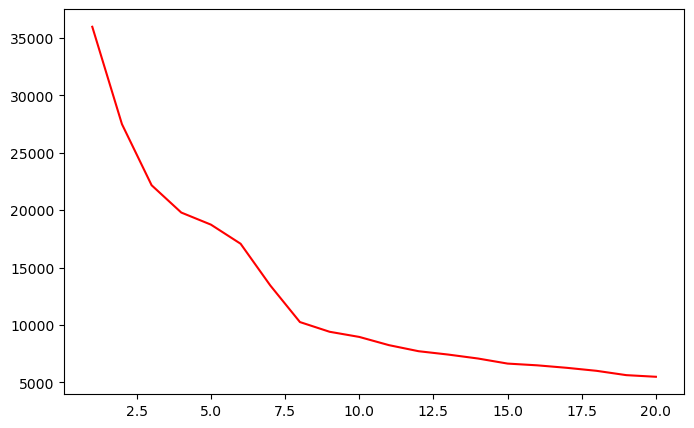

In [40]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,21),WCSS2,color='red')
plt.show()

In [41]:
opt_kmeans=KMeans(n_clusters=3,random_state=42).fit_predict(data1)
silhouette_score(data1,opt_kmeans)

0.581714981708781

In [75]:
opt_kmeans1=KMeans(n_clusters=4,random_state=42).fit_predict(data2)
silhouette_score(data2,opt_kmeans)

0.29068775501985644

In [43]:
ac_s=AgglomerativeClustering(linkage='single').fit_predict(data1)
ac_c=AgglomerativeClustering(linkage='complete').fit_predict(data1)
ac_avg=AgglomerativeClustering(linkage='average').fit_predict(data1)
ac_w=AgglomerativeClustering(linkage='ward').fit_predict(data1)

In [44]:
print(silhouette_score(data1,ac_s))
print(silhouette_score(data1,ac_c))
print(silhouette_score(data1,ac_avg))
print(silhouette_score(data1,ac_w))

0.3500102215698494
0.607667880780604
0.5638108169210418
0.5878393242297736


In [68]:
ac_s1=AgglomerativeClustering(n_clusters=2,linkage='single').fit_predict(data2)
ac_c1=AgglomerativeClustering(n_clusters=2,linkage='complete').fit_predict(data2)
ac_avg1=AgglomerativeClustering(n_clusters=2,linkage='average').fit_predict(data2)
ac_w1=AgglomerativeClustering(n_clusters=2,linkage='ward').fit_predict(data2)

In [69]:
print(silhouette_score(data2,ac_s))
print(silhouette_score(data2,ac_c))
print(silhouette_score(data2,ac_avg))
print(silhouette_score(data2,ac_w))

0.7394976882622163
0.7994750278101402
0.7994750278101402
0.27762979924922304


In [47]:
from sklearn.neighbors import  NearestNeighbors

In [103]:
nn=NearestNeighbors()
nn.fit(data1)
distances,indices=nn.kneighbors(data1)

In [104]:
distances


array([[ 0.        ,  4.31312682,  4.64644654,  7.06010875,  8.09228139],
       [ 0.        ,  6.70717955,  9.20097643,  9.39175859, 12.94105692],
       [ 0.        ,  2.40704837,  5.07368865,  5.82236675,  6.31049923],
       ...,
       [ 0.        ,  3.02311741,  3.22000909,  3.50656995,  3.67266505],
       [ 0.        ,  2.51630901,  3.52379377,  3.78839568,  3.89683017],
       [ 0.        ,  1.53426543,  1.96713514,  1.97952036,  2.52879358]])

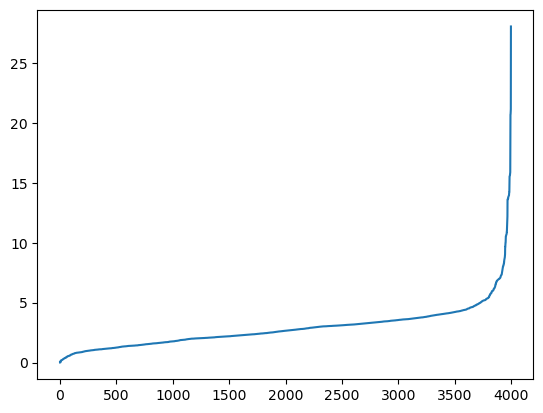

In [105]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.show()

In [92]:
db=DBSCAN(eps=5,min_samples=3)
result_dbscan=db.fit_predict(data1)
silhouette_score(data1,result_dbscan)

0.2851485515673261

In [51]:
nn=NearestNeighbors()
nn.fit(data2)
distances,indices=nn.kneighbors(data2)

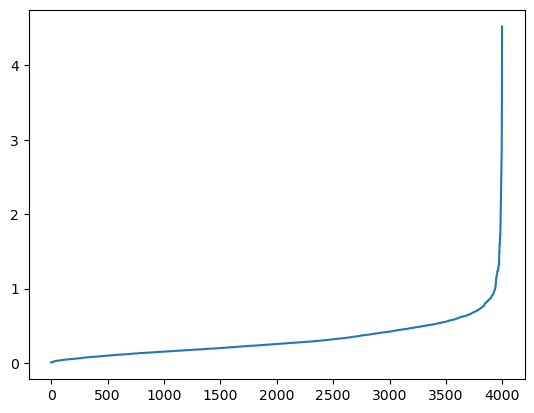

In [52]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.show()

In [81]:
db1=DBSCAN(eps=3,min_samples=3)
result_dbscan1=db1.fit_predict(data2)
silhouette_score(data2,result_dbscan1)

0.5444839724892097

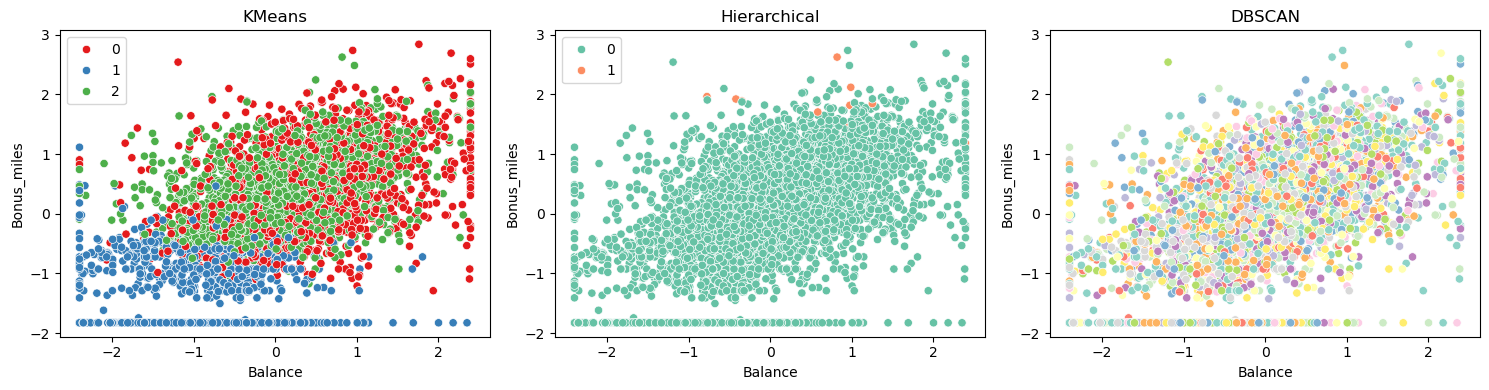

In [67]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data1.iloc[:, 0], y=data1.iloc[:, 4], hue=opt_kmeans, palette='Set1')
plt.title("KMeans")
plt.subplot(1, 3, 2)
sns.scatterplot(x=data1.iloc[:, 0], y=data1.iloc[:, 4], hue=ac_c, palette='Set2')
plt.title("Hierarchical")
plt.subplot(1, 3, 3)
sns.scatterplot(x=data1.iloc[:, 0], y=data1.iloc[:, 4], hue=result_dbscan, palette='Set3',legend=False)
plt.title("DBSCAN")
plt.tight_layout()
plt.show()

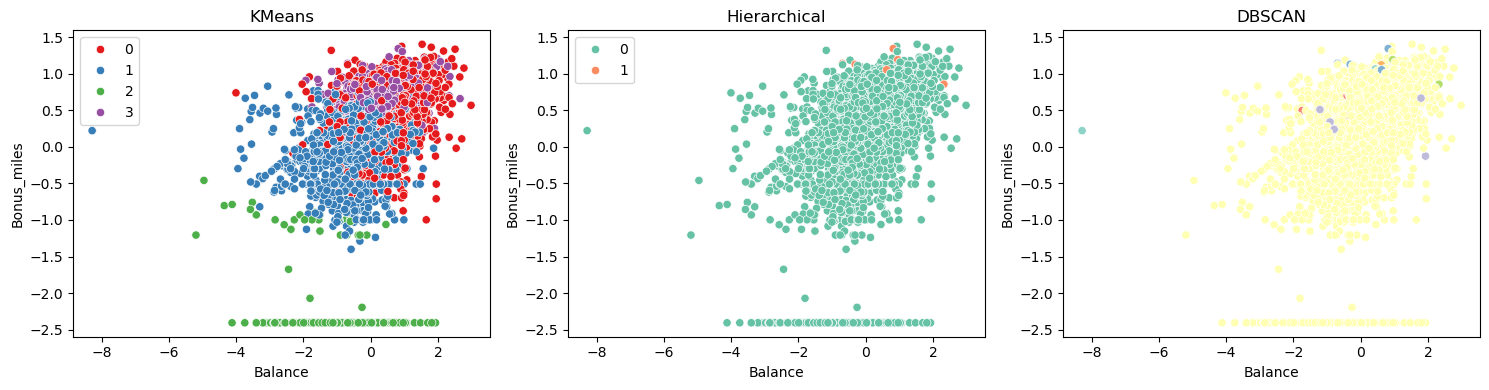

In [82]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data2.iloc[:, 0], y=data2.iloc[:, 4], hue=opt_kmeans1, palette='Set1')
plt.title("KMeans")
plt.subplot(1, 3, 2)
sns.scatterplot(x=data2.iloc[:, 0], y=data2.iloc[:, 4], hue=ac_c1, palette='Set2')
plt.title("Hierarchical")
plt.subplot(1, 3, 3)
sns.scatterplot(x=data2.iloc[:, 0], y=data2.iloc[:, 4], hue=result_dbscan1, palette='Set3',legend=False)
plt.title("DBSCAN")
plt.tight_layout()
plt.show()